In [59]:
library(rstanarm)
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2)
library(bayesplot)
library(bayestestR)
library(leaps)
library(MASS)
library(AICcmodavg)

In [52]:
url_amazon = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/amazon.txt"))
amazon = read.csv(text = url_amazon, sep = "\t")

url_divorce = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/divusa.txt"))
divorce = read.csv(text = url_divorce, sep = "\t")
df = data.frame(aprice = amazon$Amazon.Price, lprice = as.numeric(amazon$List.Price),  
                pages = amazon$NumPages, width = amazon$Width, weight = amazon$Weight..oz,  
                height = amazon$Height, thick = amazon$Thick, cover = amazon$Hard..Paper)

df$lprice[which(is.na(df$lprice))] = mean(df$lprice, na.rm = TRUE)
df$weight[which(is.na(df$weight))] = mean(df$weight, na.rm = TRUE)
df$pages[which(is.na(df$pages))] = mean(df$pages, na.rm = TRUE)
df$height[which(is.na(df$height))] = mean(df$height, na.rm = TRUE)
df$width[which(is.na(df$width))] = mean(df$width, na.rm = TRUE)
df$thick[which(is.na(df$thick))] = mean(df$thick, na.rm = TRUE)
df = df[-205,]
# head(amazon); 
head(divorce); 
# head(df)
dim(amazon); dim(df)

,year,divorce,unemployed,femlab,marriage,birth,military
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1920,8.0,5.2,22.70,92.0,117.9,3.2247
2,1921,7.2,11.7,22.79,83.0,119.8,3.5614
3,1922,6.6,6.7,22.88,79.7,111.2,2.4553
4,1923,7.1,2.4,22.97,85.2,110.5,2.2065
5,1924,7.2,5.0,23.06,80.3,110.9,2.2889
6,1925,7.2,3.2,23.15,79.2,106.6,2.1735


[1] 325  13

[1] 324   8

In [19]:
classic_amazon = lm(aprice ~ ., data = df)
classic_divorce = lm(divorce ~ ., data = divorce)

In [20]:
bayes_amazon = stan_glm(aprice ~ ., data = df, seed = 111)
bayes_divorce = stan_glm(divorce ~ ., data = divorce, seed = 111)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.130829 seconds (Warm-up)
Chain 1:                0.138649 seconds (Sampling)
Chain 1:              

In [53]:
zlm(divorce ~ ., data = divorce)

ERROR: Error in zlm(divorce ~ ., data = divorce): could not find function "zlm"


In [48]:
# summary(classic_amazon); 
summary(classic_divorce); 


Call:
lm(formula = divorce ~ ., data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9087 -0.9212 -0.0935  0.7447  3.4689 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 380.14761   99.20371   3.832 0.000274 ***
year         -0.20312    0.05333  -3.809 0.000297 ***
unemployed   -0.04933    0.05378  -0.917 0.362171    
femlab        0.80793    0.11487   7.033 1.09e-09 ***
marriage      0.14977    0.02382   6.287 2.42e-08 ***
birth        -0.11695    0.01470  -7.957 2.19e-11 ***
military     -0.04276    0.01372  -3.117 0.002652 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.513 on 70 degrees of freedom
Multiple R-squared:  0.9344,	Adjusted R-squared:  0.9288 
F-statistic: 166.2 on 6 and 70 DF,  p-value: < 2.2e-16


,(Intercept),year,unemployed,femlab,marriage,birth,military
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
3,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
4,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE
5,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


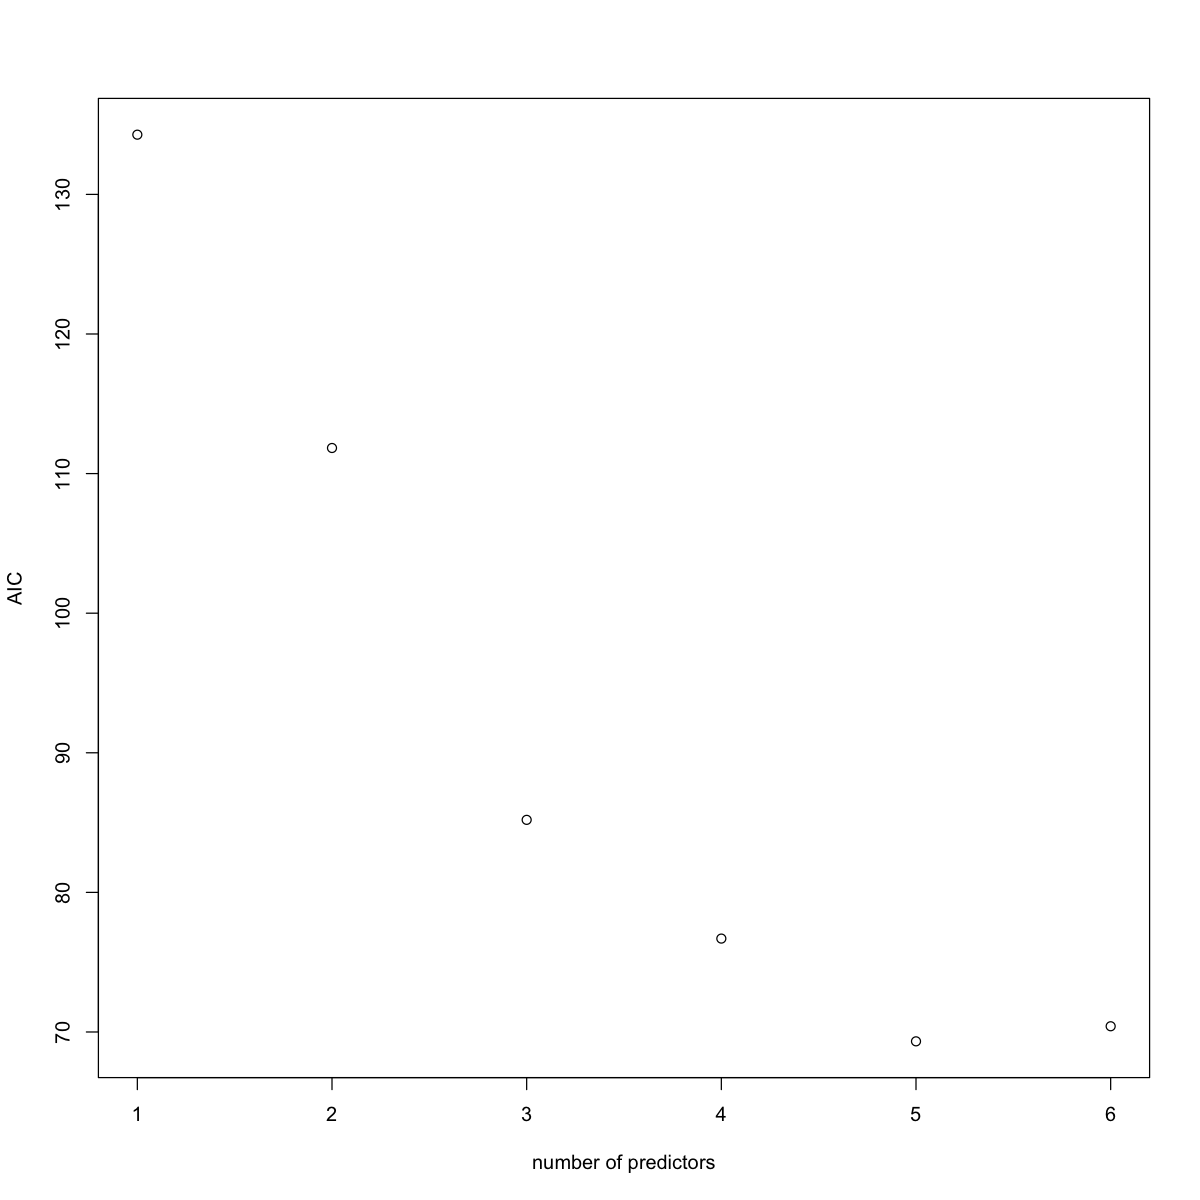

In [127]:
n = dim(divorce)[1]
reg1 = regsubsets(divorce ~ ., data = divorce)
rs = summary(reg1)
rs$which

AIC = 2*(2:7) + n*log(rs$rss/n)
plot(AIC ~ I(1:6), xlab = "number of predictors", ylab = "AIC")

In [56]:
# summary(bayes_amazon); 
summary(bayes_divorce)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      divorce ~ .
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 77
 predictors:   7

Estimates:
              mean   sd    10%   50%   90%
(Intercept) 371.8  101.6 243.4 370.0 501.9
year         -0.2    0.1  -0.3  -0.2  -0.1
unemployed   -0.1    0.1  -0.1  -0.1   0.0
femlab        0.8    0.1   0.6   0.8   1.0
marriage      0.1    0.0   0.1   0.1   0.2
birth        -0.1    0.0  -0.1  -0.1  -0.1
military      0.0    0.0  -0.1   0.0   0.0
sigma         1.5    0.1   1.4   1.5   1.7

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 13.3    0.2 13.0  13.3  13.6 

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   2.3  1.0  1971 
year          0.0  1.0  1935 
unemployed    0.0

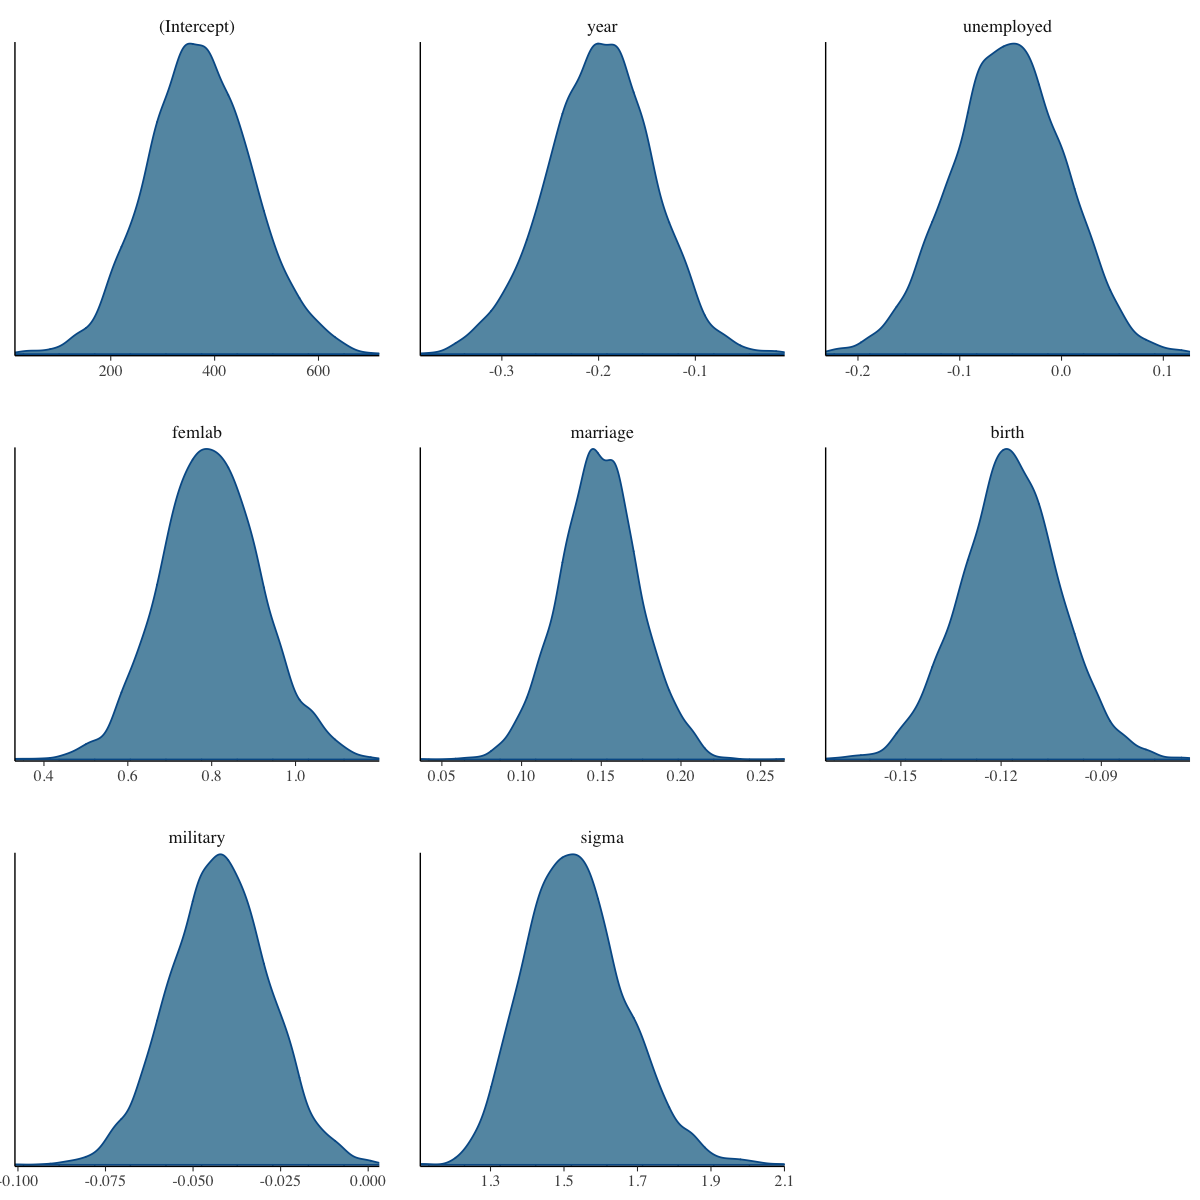

In [65]:
# mcmc_dens(bayes_amazon)
options(repr.plot.width = 10, repr.plot.height = 10)
mcmc_dens(bayes_divorce)

In [57]:
p_direction(bayes_divorce)

,Parameter,pd,Effects,Component
,<chr>,<dbl>,<chr>,<chr>
1,(Intercept),1.000,fixed,conditional
7,year,1.000,fixed,conditional
6,unemployed,0.825,fixed,conditional
3,femlab,1.000,fixed,conditional
4,marriage,1.000,fixed,conditional
2,birth,1.000,fixed,conditional
5,military,0.999,fixed,conditional


In [64]:
lmod_red_divorce = lm(divorce ~ . -unemployed, data = divorce) ;summary(lmod_red_divorce)


Call:
lm(formula = divorce ~ . - unemployed, data = divorce)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7586 -1.0494 -0.0424  0.7201  3.3075 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 405.61670   95.13189   4.264 6.09e-05 ***
year         -0.21790    0.05078  -4.291 5.52e-05 ***
femlab        0.85480    0.10276   8.318 4.29e-12 ***
marriage      0.15934    0.02140   7.447 1.76e-10 ***
birth        -0.11012    0.01266  -8.700 8.43e-13 ***
military     -0.04120    0.01360  -3.030  0.00341 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.511 on 71 degrees of freedom
Multiple R-squared:  0.9336,	Adjusted R-squared:  0.929 
F-statistic: 199.7 on 5 and 71 DF,  p-value: < 2.2e-16


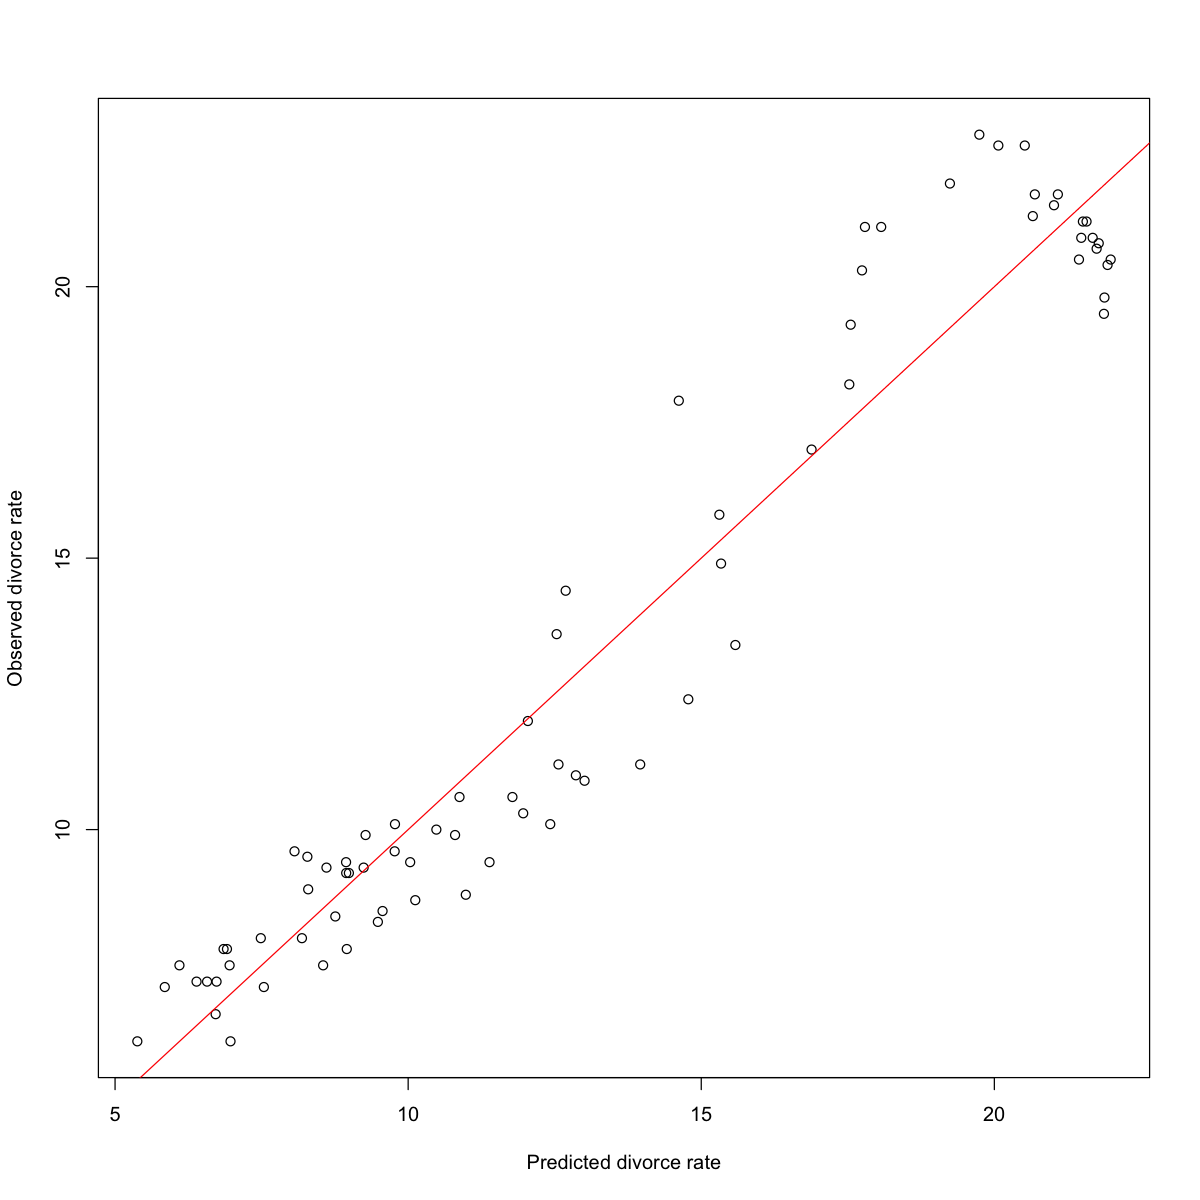

In [82]:
plot(divorce$divorce ~ predict(lmod_red_divorce),
     xlab = "Predicted divorce rate", ylab = "Observed divorce rate"); abline(0, 1, col = "red")

In [68]:
bayes_red_divorce = stan_glm(divorce ~ . -unemployed, data = divorce, seed = 111)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.292955 seconds (Warm-up)
Chain 1:                0.277365 seconds (Sampling)
Chain 1:              

In [70]:
summary(bayes_red_divorce)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      divorce ~ . - unemployed
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 77
 predictors:   6

Estimates:
              mean   sd    10%   50%   90%
(Intercept) 396.7   94.1 273.6 397.3 517.5
year         -0.2    0.1  -0.3  -0.2  -0.1
femlab        0.8    0.1   0.7   0.8   1.0
marriage      0.2    0.0   0.1   0.2   0.2
birth        -0.1    0.0  -0.1  -0.1  -0.1
military      0.0    0.0  -0.1   0.0   0.0
sigma         1.5    0.1   1.4   1.5   1.7

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 13.3    0.2 13.0  13.3  13.6 

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   2.4  1.0  1530 
year          0.0  1.0  1515 
femlab        0.0  1.0  1457 
marriage      0.0

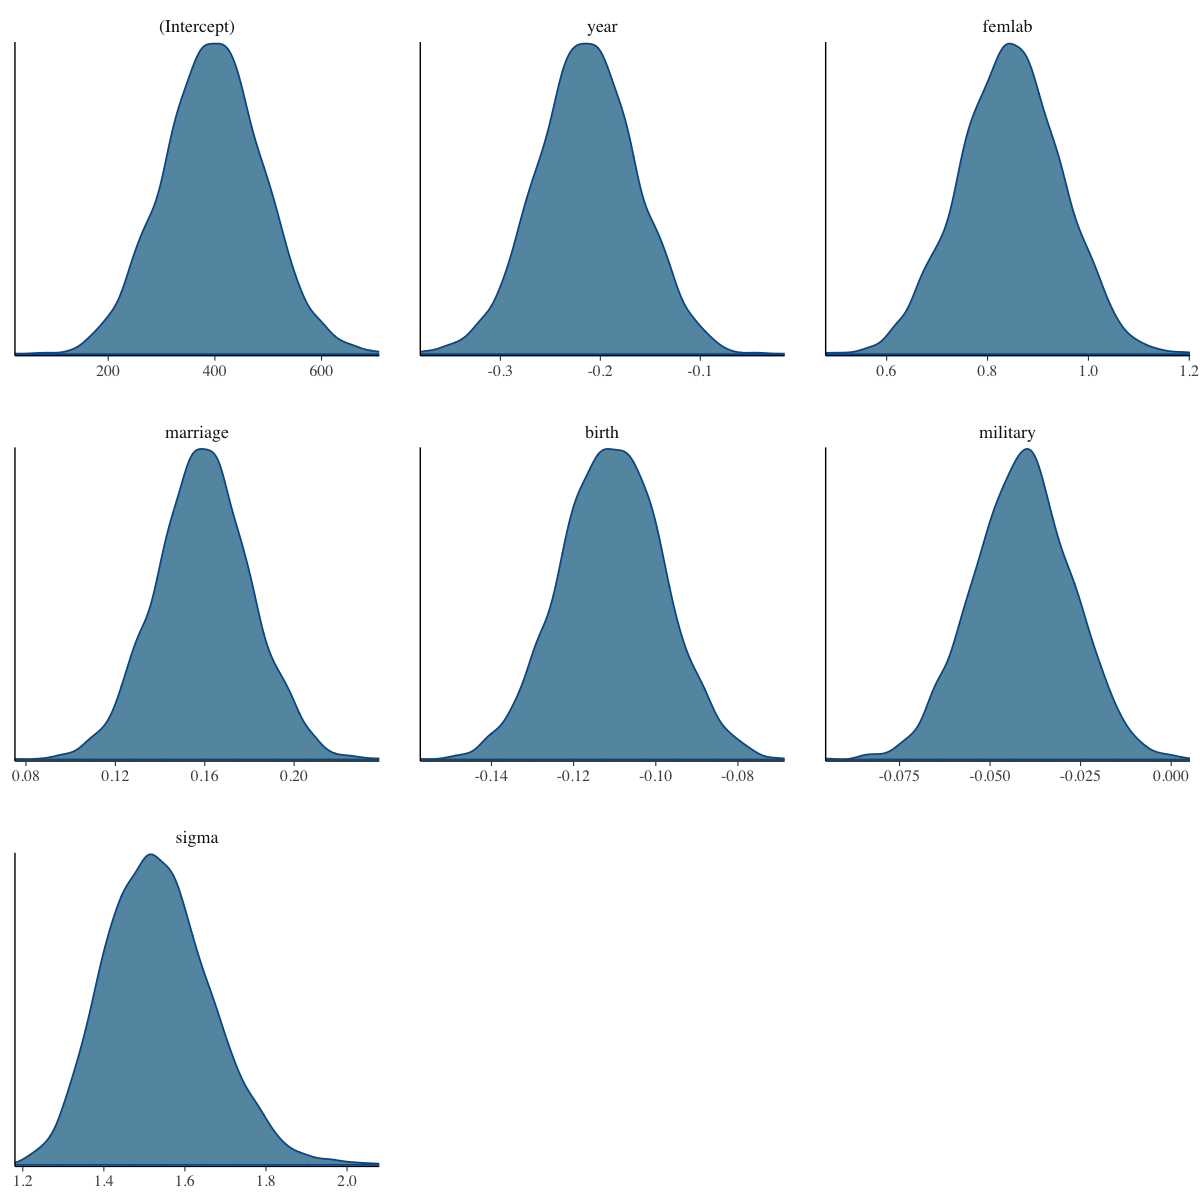

In [71]:
mcmc_dens(bayes_red_divorce)

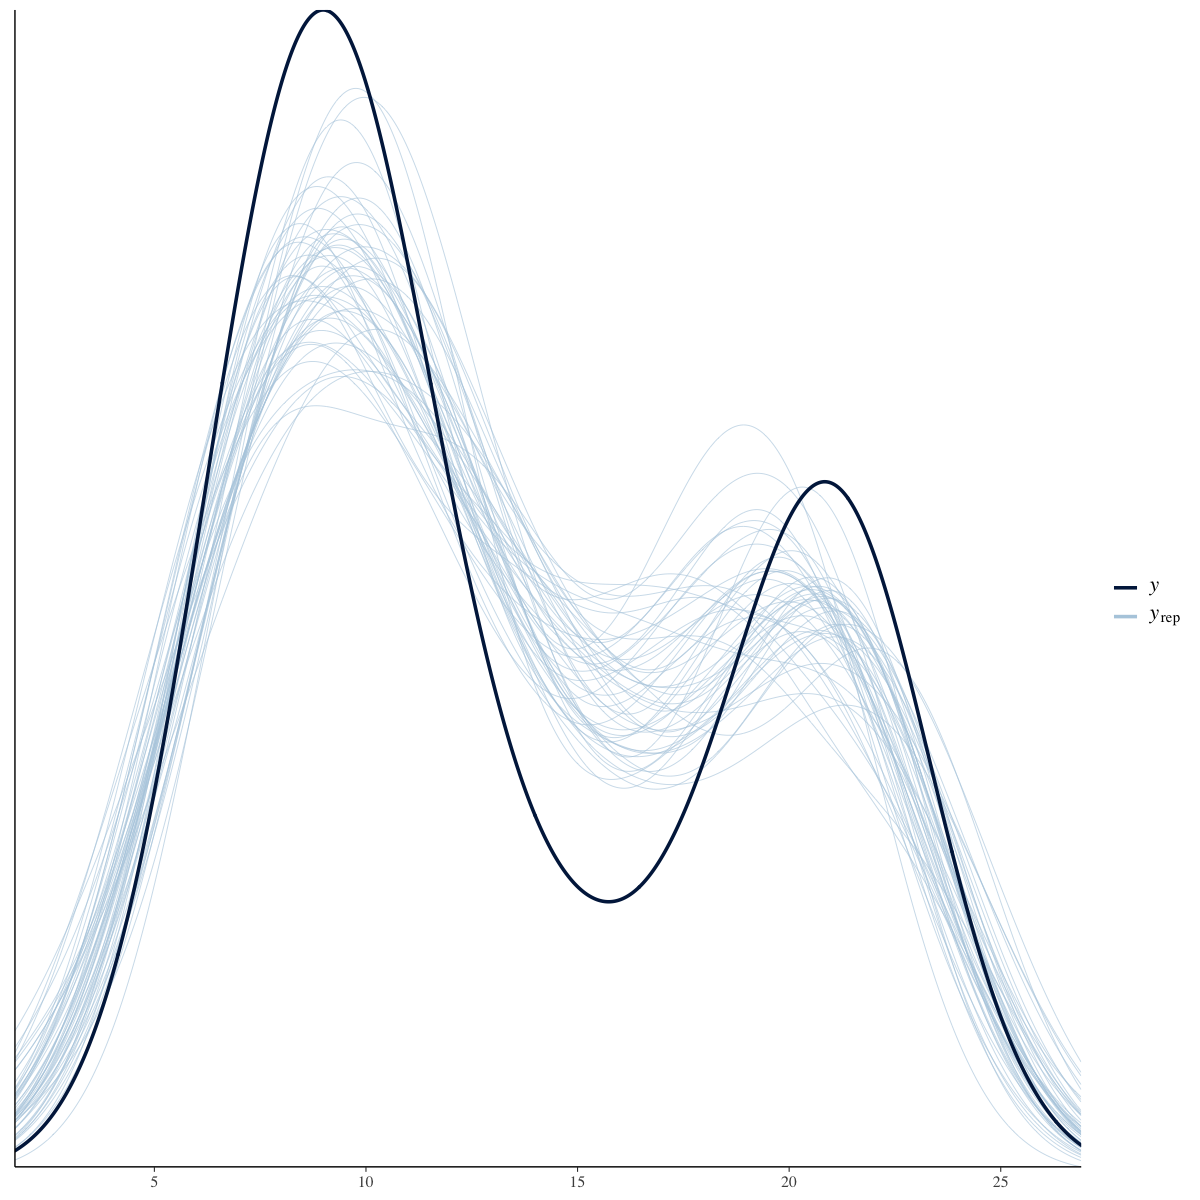

In [73]:
pp_check(bayes_red_divorce)

[1] 8.140855

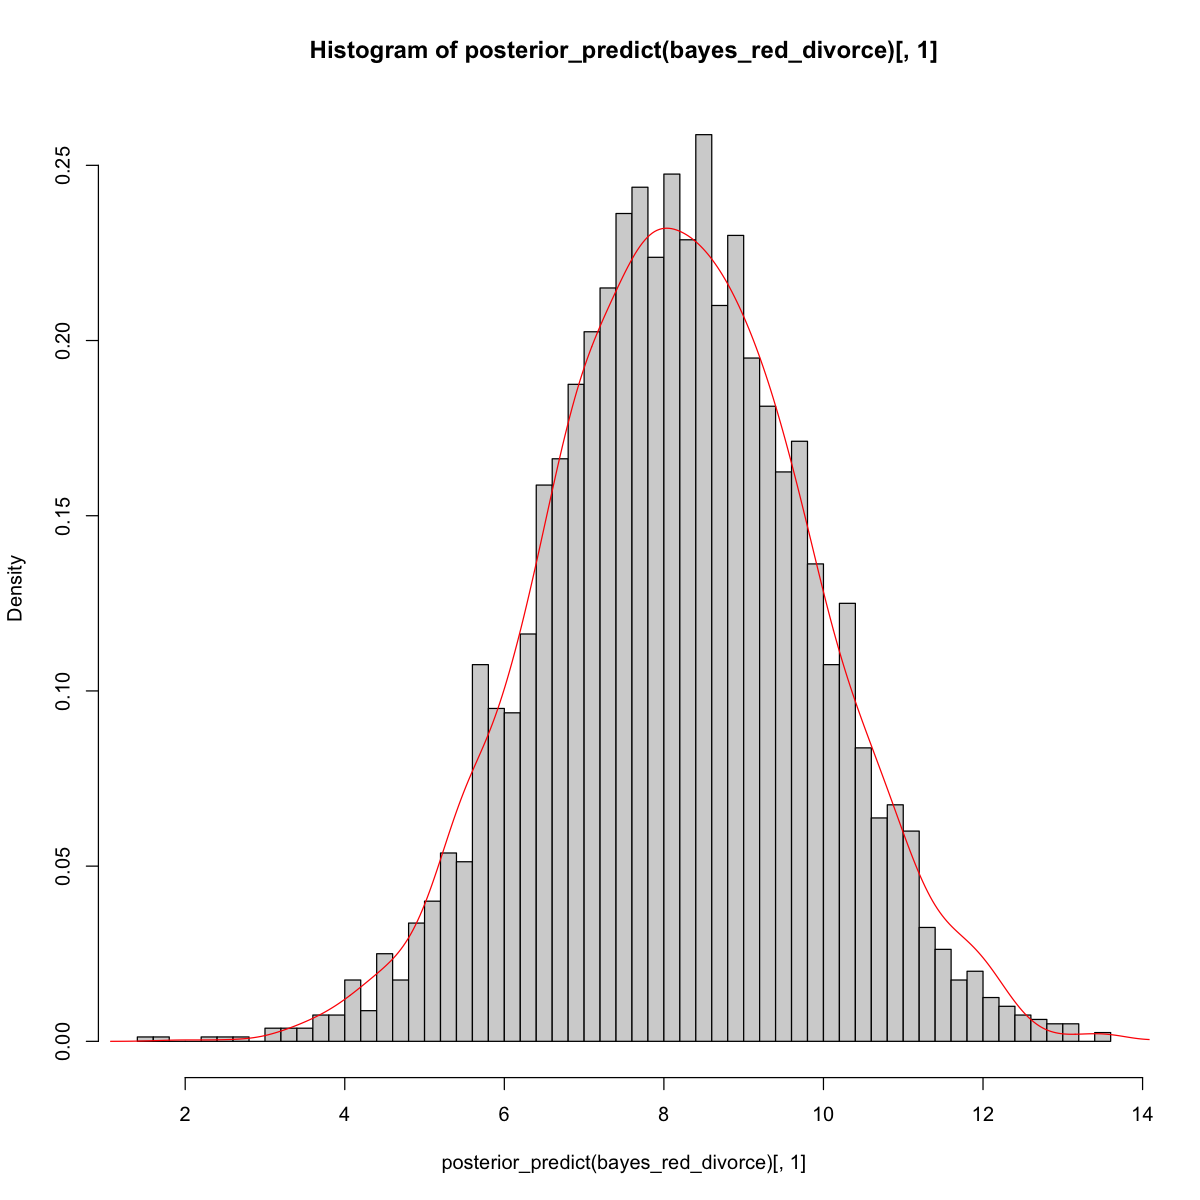

In [126]:
hist(posterior_predict(bayes_red_divorce)[, 1], prob = TRUE, nclass = 50);
lines(density(posterior_predict(bayes_red_divorce)[, 1]), col = "red")
mean(posterior_predict(bayes_red_divorce)[, 1])

In [103]:
divorce$divorce[9]; predict(lmod_red_divorce)[9]

[1] 7.8

9 
6.909102

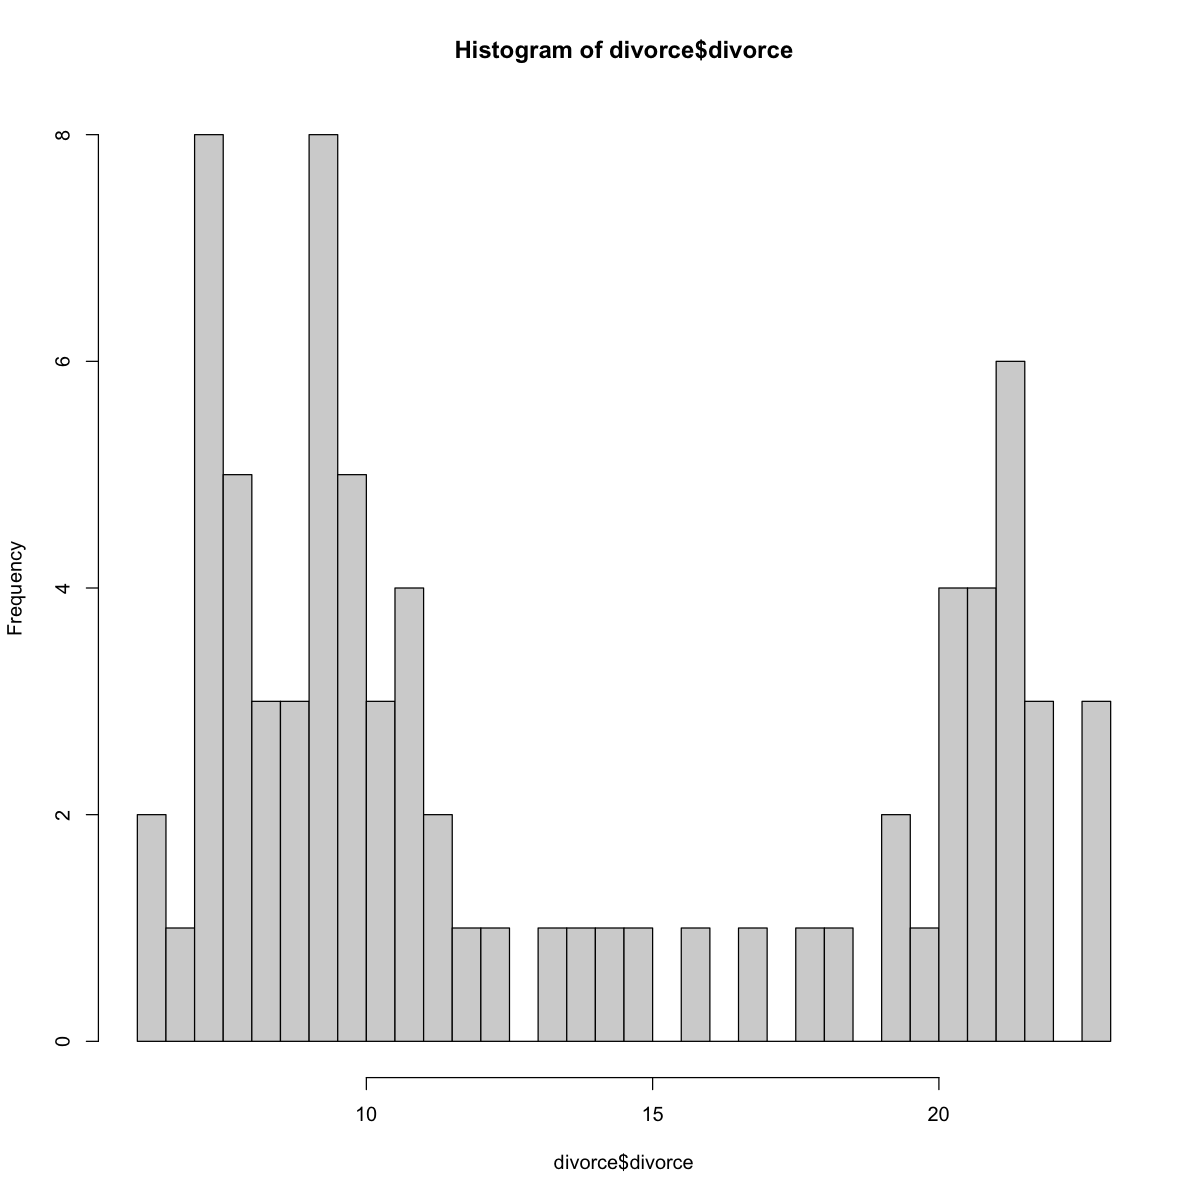

In [109]:
hist(divorce$divorce, nclass = 50)

In [121]:
b = c(mean(posterior_predict(bayes_red_divorce)[, 1]),
      mean(posterior_predict(bayes_red_divorce)[, 2]),
      mean(posterior_predict(bayes_red_divorce)[, 3]),
      mean(posterior_predict(bayes_red_divorce)[, 4]),
      mean(posterior_predict(bayes_red_divorce)[, 5]))
data.frame(divorce$divorce[1:5], predict(lmod_red_divorce)[1:5], b)

,divorce.divorce.1.5.,predict.lmod_red_divorce..1.5.,b
,<dbl>,<dbl>,<dbl>
1,8.0,8.188121,8.147563
2,7.2,6.390035,6.322208
3,6.6,6.715821,6.692991
4,7.1,7.538527,7.540150
5,7.2,6.569368,6.532420
